## 大O记法 （Order of magnitude）

用来描述函数当输入值趋向无穷大时的增长率，在算法分析中，我们通常关注最坏情况的时间复杂度，即输入数量值极大时，算法执行时间的上界。

#### 不考虑的因素
- 具体的执行时间：不关心时间，因为受外部因素的印象，如CPU速度、负载、编译器优化等
- 系数和低阶项
- 常数时间：即使某些操作（如复制、移动等）在实际执行中需要时间，大O分析中常常假设这些操作的时间时常数，并聚焦于变化最显著的部分

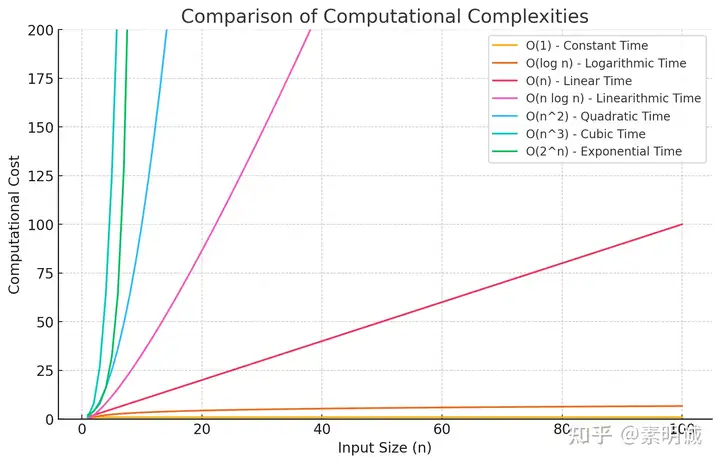

In [2]:
def fuc_a(n):    
    a = 5
    b = 6
    c = 10
    for i in range(n):
        for j in range(n):
            x = i * i
            y = j * j
            z = i * j 
    for k in range(n):
        w = a * k + 45
        v = b * b
    d = 33

上述函数的赋值操作的数量为 $T(n) = 3+3n^2+2n+1$,其中$n^2$其主导作用，所以这个函数的**时间复杂度是$O(n^2)$**

## Python数据结构的性能

#### 列表

- 索引和给某个位置赋值，无论列表多长，都是常数阶的操作；
- 加长列表，append是常数阶，连接操作是$O(k)$,k是待连接列表的长度

In [36]:
def test1():
    l = []
    for i in range(1000):
        l = l + [i]
        
def test2():
    l = []
    for i in range(1000):
        l.append(i)
        
def test3():
    l = [i for i in range(1000)]
    
def test4():
    l = list(range(1000))

Timer对象，第1个参数是需要进行计时的python语句，第2个参数是只运行一次的初始化语句；

$from __main__ import test1$ 将test1函数从__main__命名空间导入timeit设置计时的命名空间。

In [54]:
from timeit import Timer
t1 = Timer('test1', 'from __main__ import test1')
t2 = Timer('test2', 'from __main__ import test2')
t3 = Timer('test3', 'from __main__ import test3')
t4 = Timer('test4', 'from __main__ import test4')
print(" concatenation: {:15.4f}us,\n appending: {:19.4f}us,\n list comprehension: {:10.4f}us,\n list range: {:18.4f}us".format(t1.timeit(), t2.timeit(), t3.timeit(), t4.timeit()))  # t1.timeit()参数为空，默认执行100万次

 concatenation:          0.0101us,
 appending:              0.0105us,
 list comprehension:     0.0093us,
 list range:             0.0094us


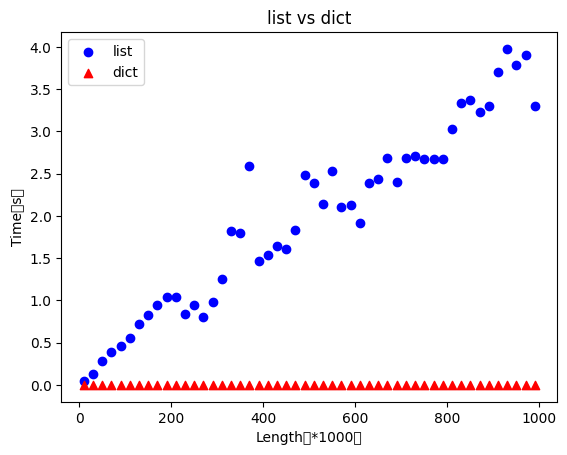

In [61]:
import random
n_list = []
list_ = []
dict_ = []
for i in range(10000, 1000001, 20000):
    t = Timer(f"random.randrange({i}) in x", "from __main__ import random, x")
    x = list(range(i))
    list_time = t.timeit(1000)
    x = {j: None for j in range(i)}
    dict_time = t.timeit(1000)
#     print(f"{i:<10}{list_time:>10.3f}{dict_time:>10.3f}")
    n_list.append(i / 1000)
    list_.append(list_time)
    dict_.append(dict_time)
    
import matplotlib.pyplot as plt

# 创建散点图
plt.scatter(n_list, list_, marker='o', label='list', color='blue')  # y1用圆形表示
plt.scatter(n_list, dict_, marker='^', label='dict', color='red')  # y2用三角形表示

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('list vs dict')
plt.xlabel('Length(*1000)')
plt.ylabel('Time(s)')

# 显示图表
plt.show()
